In [6]:
import pandas as pd
import random
from scipy.spatial.distance import cosine
import scipy
import scipy.stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms 
import numpy as np 

In [7]:
file = pd.read_csv("sample-data.csv")
t = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
matrix = t.fit_transform(file['description'].values.astype('U'))
cos = linear_kernel(matrix, matrix)
results = {}
for index, row in file.iterrows():
    sim = cos[index].argsort()[:-100:-1]
    items = [(cos[index][i],file['item_id'][i]) for i in sim]
    results[row['item_id']] = items
  
    

In [8]:
def item(id):
    return ds.loc[ds['id'] == id]['description'].tolist()[0].split(' - ')[0]

def contentrecommend(item_id, num):
    suggestion=[]
    recs = results[item_id][:num+1]
    for rec in recs:
        if ((rec[1]))!=item_id:
            suggestion.append([((rec[1])),((rec[0]))])
    print("User ID should look at Items" + str(suggestion))
    return suggestion

result=contentrecommend(13, 19)
print(result)

User ID should look at Items[[135, 0.18111742446648516], [479, 0.15627445788362146], [449, 0.14068235862947215], [17, 0.13274025336344811], [214, 0.12861887107300871], [115, 0.12295786700256288], [149, 0.12240079446193676], [343, 0.11838532621932531], [445, 0.11660737768558552], [344, 0.11272710872422535], [472, 0.10696436844779909], [213, 0.10618410701204396], [10, 0.10345545411607306], [74, 0.09906885757455694], [55, 0.097016008594318803], [425, 0.0945519777200369], [52, 0.089594498920569102], [444, 0.083460487157510921], [402, 0.08331718780399118]]
[[135, 0.18111742446648516], [479, 0.15627445788362146], [449, 0.14068235862947215], [17, 0.13274025336344811], [214, 0.12861887107300871], [115, 0.12295786700256288], [149, 0.12240079446193676], [343, 0.11838532621932531], [445, 0.11660737768558552], [344, 0.11272710872422535], [472, 0.10696436844779909], [213, 0.10618410701204396], [10, 0.10345545411607306], [74, 0.09906885757455694], [55, 0.097016008594318803], [425, 0.0945519777200369

User ID should look at Items[[135, 0.18111742446648516], [479, 0.15627445788362146], [449, 0.14068235862947215], [17, 0.13274025336344811], [214, 0.12861887107300871], [115, 0.12295786700256288], [149, 0.12240079446193676], [343, 0.11838532621932531], [445, 0.11660737768558552], [344, 0.11272710872422535], [472, 0.10696436844779909], [213, 0.10618410701204396], [10, 0.10345545411607306], [74, 0.09906885757455694], [55, 0.097016008594318803], [425, 0.0945519777200369], [52, 0.089594498920569102], [444, 0.083460487157510921], [402, 0.08331718780399118]]


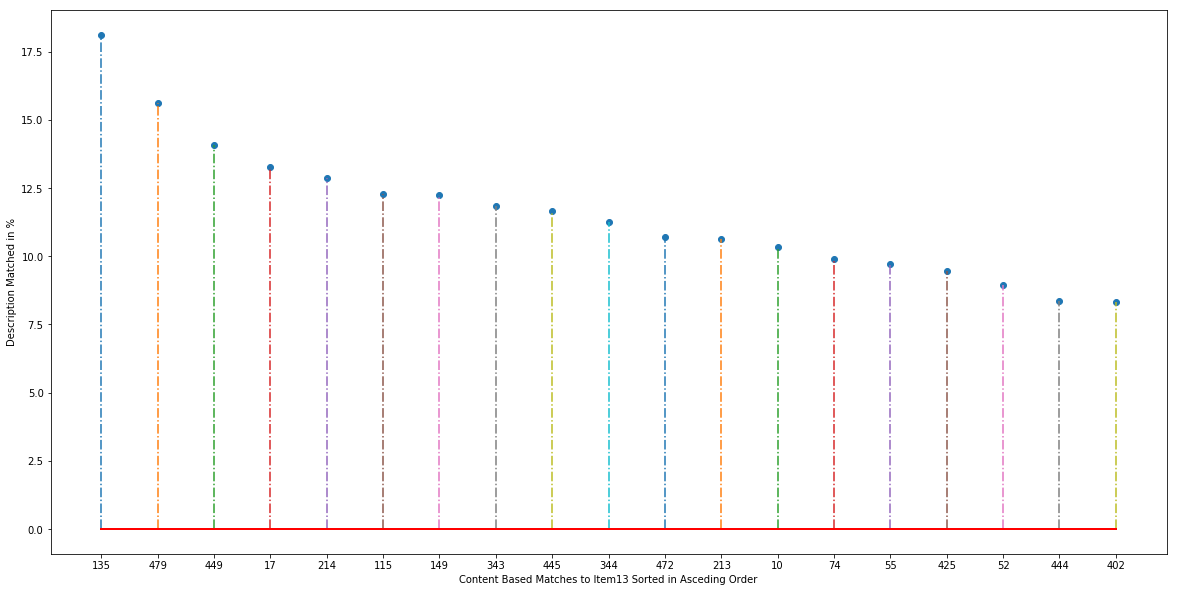

In [11]:
s=[]
f=[]
my_ticks=[]
plt.figure(figsize=(20,10))
result=contentrecommend(13, 19)
for i in range(len(result)):
    s.append(i)
    my_ticks.append(result[i][0])
    percentage=result[i][1]*100
    f.append(percentage)
plt.xlabel('Content Based Matches to Item13 Sorted in Asceding Order', fontdict=None, labelpad=None)
plt.ylabel('Description Matched in %', fontdict=None, labelpad=None)
plt.xticks(s, my_ticks)
markerline, stemlines, baseline = plt.stem(s, f, '-.')
plt.setp(baseline, color='r', linewidth=2)
plt.show()